# Métodos supervisados
* Machine learning aprende de datos.
* Los metodos supervisados requieren etiquetas (labels)
* La idea es predecir una salida luego de entrenarse con " muchos " datos.

Los metodos supervisados que veremos en este curso

* Regresi'on lineal
* Regresi'on log'istica
* Redes Neuronales
* Support Vector Machines (SVM).

## Introducci'on:
Hay una colecci'on de m'etodos supervisados y t'ecnicas usado por ellos.

* Optical Character Recognition: Reconocimiento de caracteres, lo vemos al final del curso. Varios ejemplos:
    * [Shapecatcher](https://shapecatcher.com/) es un ejemplo claro de OCR y como se puede entrenar mas el modelo.

    * [Phtomath](https://photomath.com/)  es otra aplicaci'on de OCR.

    * y muchas mas....

* Describir una imagen (captioning). Por ejemplo de 1 millon de placas, busca la placa DHL2025.
* Aplicaciones medicas. Detectar tumores  y otros.

* Manejo autonomo. Debe reconcer las senales de transito.

* AL final del curso en OCR les explico como detectar las senalaes de transito y otras.

# Regresion lineal.

Ejemplo: Vamos a vender nuestra casa. Entonces tenemos unos atributos de la casa (features), por ejemplo, area, numero de habitaciones, estrato, tipo de arquitectura, etc. Por ahora solo pensemos en el area (para hacernos la vida facil). Buscamos en nuestra vecindad una base de datos con areas y precios, para tenerla como referencia.

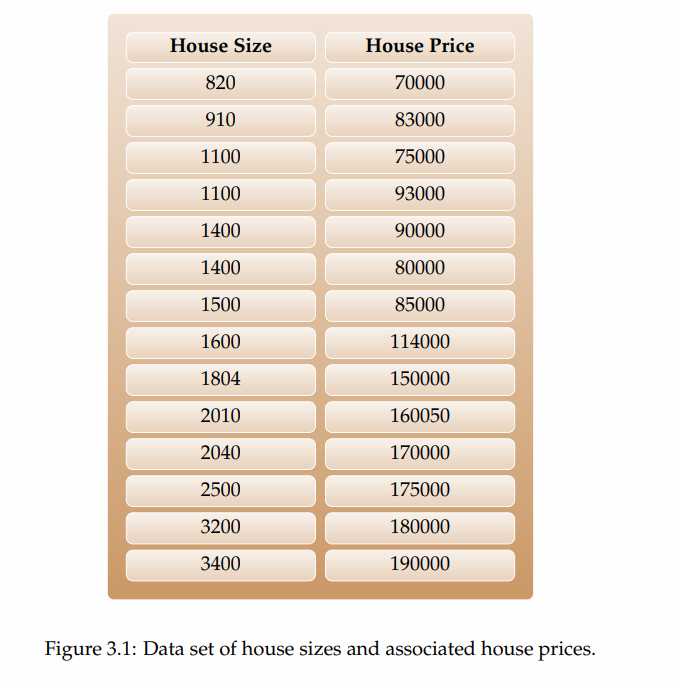

La regresion lineal, como su palabra lo indica se representa mediante una ecuacio lineal

$$X \theta = y $$
Note el cambio de notaci'on. Para nostros en este curso $X$ es la matriz de datos $\theta$ es el parametroa a **aprender** y $y$ son las etiquetas.

Planteamos el problema de la siguiente forma.

$$y_i = \theta_0 + \theta_1 x_i \tag{1} $$
donde $y_i$ es el precio de la casa $i$, $\theta_0$ es un parametro que debemos encontrar (aprender) lo mismo que $\theta_1$ y finalmente, en esta ecuacion $x_i$ es el area de la casa $i$.

De forma vectorial podemos escribir esto (1) como

$$y_i = (1 , x_i) (\theta_0, \theta_1)^T $$
con este truco lo podemos llevar a forma matricial

$$\begin{pmatrix}
1 & 820 \\
1 & 910 \\
1 & 1100  \\
1 & 1100 \\
\vdots & \vdots \\
1 & 2500 \\
1 & 3200 \\
1 & 3400
\end{pmatrix}
\binom{\theta_0}{\theta_1}
= \begin{pmatrix}
7000 \\
83000 \\
75000 \\
90000 \\
\vdots  \\
175000 \\
180000 \\
190000
\end{pmatrix} $$
Comentario importante:
Los 1s de la primera columna de la primera matriz representan el coeficiente de $\theta_0$ el cual es el **intercepto** y en ML lo llaman **bias**.





La notaci'on es:

$$
X = \begin{pmatrix}
1 & 820 \\
1 & 910 \\
1 & 1100  \\
1 & 1100 \\
\vdots & \vdots \\
1 & 2500 \\
1 & 3200 \\
1 & 3400
\end{pmatrix}
\quad , \quad
 \theta = \binom{\theta_0}{\theta_1}  
 \quad , \quad
 y =  \begin{pmatrix}
7000 \\
83000 \\
75000 \\
90000 \\
\vdots  \\
175000 \\
180000 \\
190000
\end{pmatrix}  $$

Introducimos el concepto de **hipotesis**, es

$$h(\theta, x_i) = x_i^T \theta $$.

Las hipotesis se usan para
* formular la funci'on de costo
* para evaluar, luego del aprendizaje, la predicci'on (el precio de mi casa).

Como se relaciona este problema con el de **minimos cuadrados**.



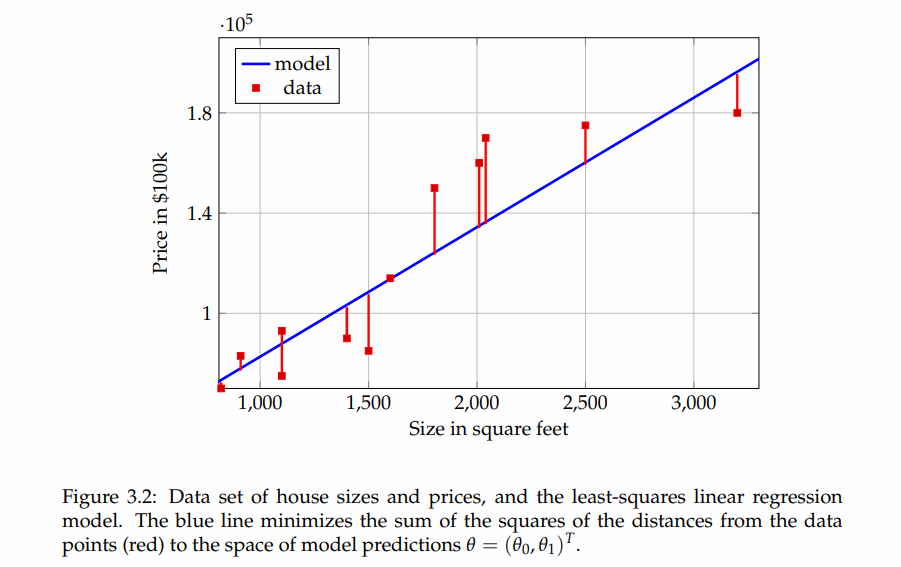

Los cuadrados rojos en la Figura 3.2 representan las coordenadas $(x,y)$ donde $x$ el area de la casa y $y$ el precio. La linea azul es la **regresion lineal** es la linea que "mejor" se ajusta a los datos que tenemos.
Mejor, es que produce el menor error de suma de cuadrados. Matematicamente

$$J(\theta) = \sum_{j=1}^m  (y_i - x_i^T \theta)^2  = \| X \theta - y \|^2 \tag{2} $$
En este curso $m$ es el numero de muestras.

Este es el problema de minimos cuadrados que resolvimos en clase anterior.

$$X \theta = y  $$
$$X^T X \theta = X^T y  $$
Estas son las ecuaciones normales.

* $X^T X$ tiene inversa?
    * Si, entonces hallamos la inversa
    * No, regularizamos. Agregamos $\lambda I$, $\lambda > 0$, $\lambda \ll 1$

En cualquier caso la matriz $X^T X$ la pensamos como positiva definida.

Es facil hacer los siguientes computos en Python (o Matlab)

$$X^T X = \begin{pmatrix} 14 & 24784 \\ 24784 & 52156616\end{pmatrix}  $$
La inversa esta dada por

$$(X^T X)^{-1} = \begin{pmatrix} 4.49 \times 10^{-1} & -2.1375 \times 10^{-4} \\ -2.1375 \times 10^{-4} & 1.2075 \times 10^{-7} \end{pmatrix}.  $$

La soluci'on es

$$\theta = (X^T X)^{-1} X^T y  $$
y es
\begin{eqnarray}
\theta_0 &=& 30994.74 \\
\theta_1 &=& 51.69
\end{eqnarray}

No hemos acabado. Si nuestra casa tiene 1000 pies cudrados.
entonces

$$P = h(\theta, X) = (1 \quad x) \binom{\theta_0}{\theta_1}  = \theta_0 + \theta_1 \times 1000 = 82686 \;  \text{dolares} $$

La Ecuacion (2) se llama **funcion de costo, funci'on objetivo, funcion de perdida** .
(cost function, target function, loss function)



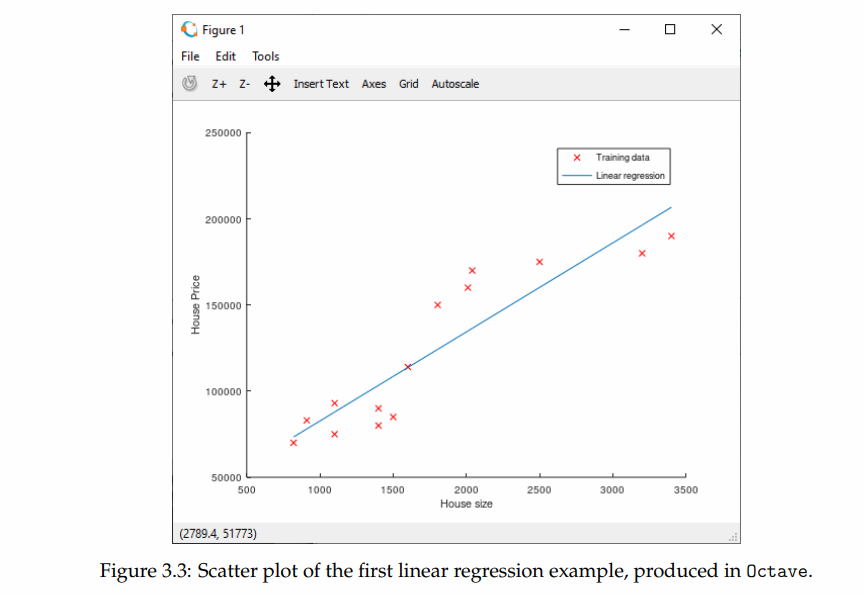

La Figura 3.3. muestra los calculos hechos con `Octave`.

Este ejemplo muestra el caso de la regresi'on **univaridada**. Es decir de una sola variable (el area de la casa). En la practica la regresion comunmente es multivarida. Si fuese tamano y numero de habitaciones seria **bivariada** y seria un plano y los puntos flotando al redededor del plano.
No importa el numero de dimensiones la ecuacion es la misma

$$X^T X \theta = X^T y $$

## Metodos de Gradiente para minimizar problemas lineales/o no lineales.
Llamemos $A=X^T X$, y $b=X^T y$, entonces debemos resover el sistema lineal

$$A \theta = b  \tag{3}  $$
La Figura 3.4 muestra distintos metodos para resolver el problema (3).



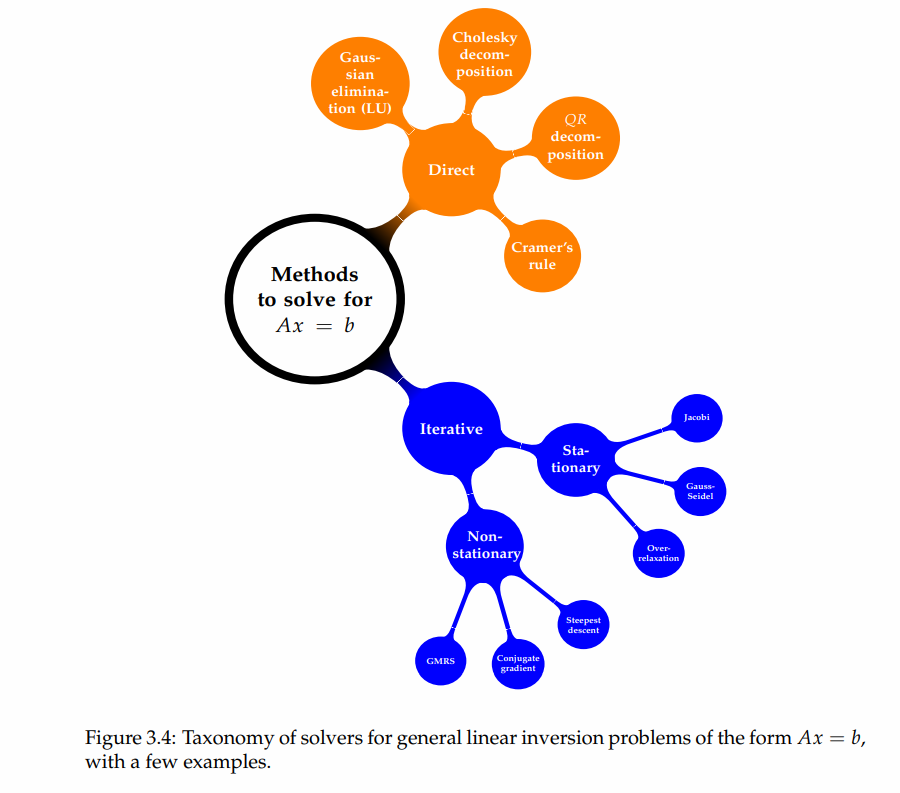

**Motivacion**: Para que los metodos de gradiente?

* En la practica (ML) las matrices son inmensas y muchas veces sparse (poco densas) Esto es impractico para los metodos directos.

* El metodo de ecuaciones normales funciona **solo** para funciones de costo cuadraticas. O sea gradientes lineales. No funciona para funciones mas generales (altamente no lineales, por ejempo con $\cos, \tan, ^3, \log , etc$.)

* El gradiente tiene hasta hoy la mejor relacion costo/beneficio para sistemas grandes. En particular, hasta donde yo se, las redes neuronales trabajan con el gradiente.

* Casi el 100 por ciento de los metodos que usamos en esta clase requieren el gradiente.

* Se necesitan los siguientes pasos:
    * Definir la funcion de costo. (en el ejemplo es la funcion (2).
    * Hallar el gradiente (la coleccion de derivadas parciales) de la funcion de costo. En general se cualculan de forma numerica.
    * El gradiente se usa para **descender** al minimo de la funcion de costo.

Que hay otros metodos para resolver $A \theta = b$? Si, por ejemplo:

* Simulating annealing. Es bueno para encontrar minimos globales, pero no lo usamos en este curso.
* Pattern Search (busqueda de patrones). No requiere el gradiente.

* Metodos de Newton (usan el gradiente y hasta la matriz Hessiana)
Que problema tiene el Hessiano? Piense en 1000 dimensiones,
entonces las derivadas parciales del gradiente son  1000,
el Hessiano tiene 1000 x 1000 = 1 millon.  Pero esto por cada dato. Si tienes 1000 de datos, el costo es inmenso.
* Quasi-Newton. Usan hasta segundo orden con la matriz Hessiana aproximada a una diagonal. L-BFGS, "L" limited memory. El BFGS: Broyden, Fletcher, Goldfarb, Shanno.

* Algoritmos evolutivos: Siguien la evolucion biol'ogica. Por ejemplo
[particle swarm optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization)

* y seguramente habran muchos mas.

* Se me olvidada uno muy importante. Si $A^+$ es la pseudo-inversa de $A$
entonces la " mejor " solucion de $A \theta = b$ es

$$\theta \approx A^+ b. $$




Como usamos el gradiente?   Esto lo mostramos a partir de " ya ".

Nos vemos  a las 10:31?  

La idea del metodo del gradiente es en tres pasos:

1. Formular la funcion de costo (minimizar).
2. Estimar el gradiente de la funcion de costo.
3. Usar el gradiente para hallar el minimo.

La funci'on de costo para regresion lineal es:

Veamos
1.
$$J = \frac12 \| X \theta - y \|^2 = \frac12 \| h(\theta, x) - y \|^2 = \frac12 \sum_{j=1}^m ( h(\theta, x^{(i)}) - y_i )^2.  $$

2. Tomamos la derivada de la funci'on de costo. Recuerden que $h(\theta, x^{(i)}) = (x^{(i)})^T \theta $

Tenemos que

\begin{eqnarray}
\frac{\partial J}{\partial \theta_k} = \sum_{i=1}^m (h(\theta, x^{(i)}- y_i)
x_{ik}
\end{eqnarray}
donde $x_{ik}$ es la $k$ componenente de la muestra $x^{(i)}$ .

El paso 3. lo discutimos en detalle ahora.

3. Por ahora vamos a interpretar como se ejecutaria este paso 3.

Recuerden de su curso en calculo en varias que el gradiente es la direccion de maximo ascenso.  

Tambien del varias tenemos que

$$\frac{\partial J}{\partial u} = \nabla J \cdot u  $$
Ahora

$$\nabla \cdot u = \| \nabla J \| \cos \beta $$
donde $\beta$ es el angulo formado por el gradiente y la direccion $u$.
Ahora bien, el maximo ascenso se da cuando $\beta=0$, $\cos 0 = 1$.
Por la misma razon $\beta=\pi$ tenemos el maximo decrecimiento.
Es decir

$$u = - \frac{\nabla J(\theta)}{\| \nabla J(\theta) \| } $$
Esta es la **direccion de maximo descenso**.

La idea es:

$$\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla J(\theta^{(i)})  $$
Es iterativo. $\theta^{(0)}$, se escoge por lo general aleatoriamente.
Quien $\alpha$? A alpha se le conoce como el "paso" (learning parameter).
Es un hiperparametro (hiperparametro es cualquier parametro que no sea $\theta$.)

Como escogemos $\alpha?$
Veamos una Figura.


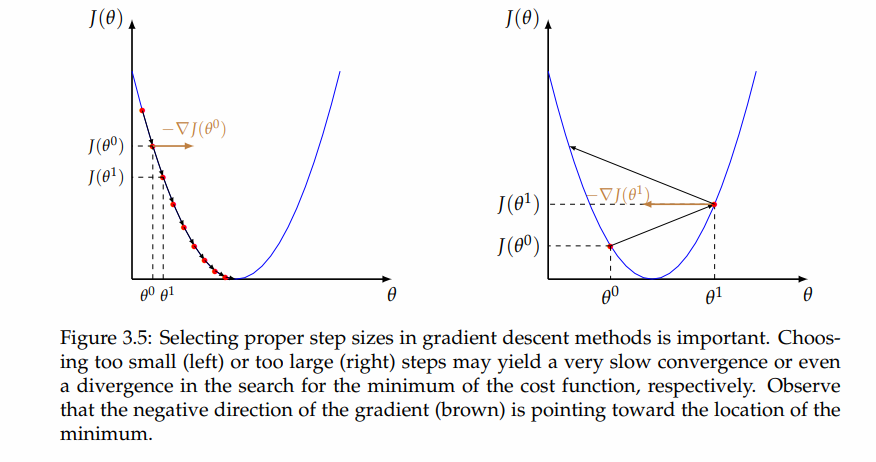

Aca existe una relacion de costo/beneficio.

* Si $\alpha \ll 1$, entonces converge pero muy **lentamente** (a pasos diminutos). Ver ejemplo Figura 3.5 izquierda.
* Si $\alpha \gg  0$, entonces el sistema puede **diverger**. Ver ejemplo Figura 3.5.



El gradiente de la funcion de costo esta dado por

$$\nabla J(\theta) = X^T ( X \theta - y).  $$

Quisieramos descender lo mas rapido posible al minimo. Usted dice, claro con $-\nabla J(\theta)$ bajamos mas rapido, pero **ojo**.

No tenemos control sobre el gradiente ni la funcion de costo. El unico hiper parametro sobre el que tenemos  es $\alpha$.

### Steepest Descent: Maximo denscenso.
** The line search algorithm**:
Que valor tiene $\alpha$ para parar donde debemos parar y cambiar de direccion.

De las ecuacions normales $\nabla J(\theta) = 0$

$$X^T X \theta = X^T y  $$
Por facilidad llamos $A = X^T X$, $b = X^T b$ de forma que tenemos

$$A \theta = b  $$
Es decir

$$\nabla J(\theta) = A \theta - b $$

Note que resolver $A \theta= b$ es lo mismo que minimizar la paraboloide

$$z = \frac12 \theta^T A \theta - b^\theta + c. $$

El truco es el siguiente, tomado el calculo. Definimos una funcion con un parametros $\alpha$

$$\varphi(\alpha) = J[ \theta_0 - \alpha \nabla J(\theta_0)] $$
Debemos hallar el $\alpha$ optimo para minizar la trayectoria a lo largo de la direccion negativa del gradiente. Recurriendo al calculo

$$\varphi'(\alpha) = \nabla J[ \theta_0 - \alpha \nabla J(\theta_0)] \cdot \nabla J(\theta_0).  $$

Para simplificar

$$\theta_1 = \theta_0 - \alpha \nabla J(\theta_0) \tag{4} $$

$$\varphi'(\alpha) = \nabla J ( \theta_1))  \cdot \nabla J(\theta_0).  $$
Queremos que $\varphi'(\alpha) = 0$. Esto implica que el gradiente en $\theta_1$ es **ortogonal** al gradiente en $\theta_0$.


Multiplicamos la Ecuacion (4) por $A$ a izquierda y restamos $b$

$$A \theta_1 - b = A \theta_0 -b - \alpha A \nabla J(\theta_0)  \tag{5} $$
Por conveniencia defino cambio de variable (nueva notaci'on)

$$ r_0 = A \theta_0 - b = \nabla J(\theta_0) $$
$$ r_1 = A \theta_1 - b = \nabla J(\theta_1) $$
con esta nueva notaci'on escribimos la Ecuacion (5) como

$$ r_1 = r_0 - \alpha A \nabla J(\theta_0) = r_0 - \alpha A r_0. \tag{6}$$

Usamos el hecho de que $r_0 \perp r_1$. Entonces mulplicamos a izquierda por $r_0$ la Ecuacion (6)

$$ 0 = \| r_0 \|^2 - \alpha r_0^T A r_0  $$
de aca despejamos $\alpha$.

Encontramos

$$\alpha = \frac{\| r_0 \|^2}{r_0^T A r_0 } $$

Ya con esto mostramos el algoritmo de SD (Steepest Descent) maximo descenso.

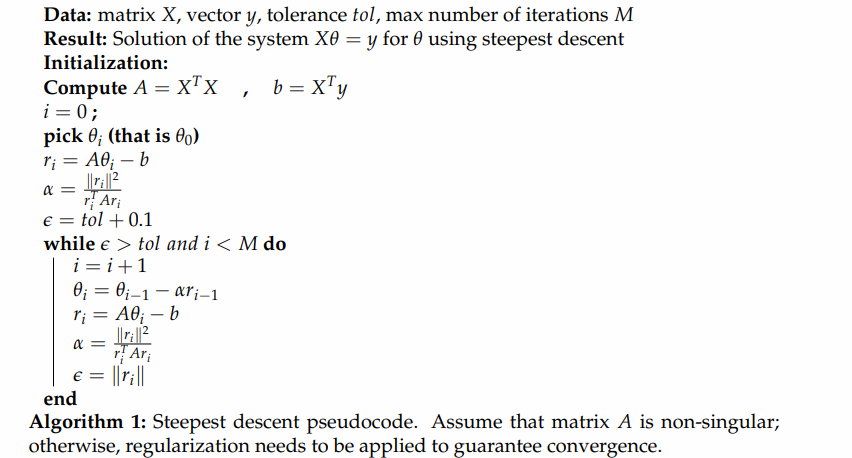

**Ejemplo 3.1.1** (toy problem). Asumamos que $A=X^T X$ es una matriz $2 \times 2$ y $b$ un vector dados por

$$ A = X^T X =  \begin{pmatrix}
10 & 0 \\ 0 & 1
\end{pmatrix} \quad , \quad b = \binom{1}{-1}  $$

Con este ejemplo implementamos el algoritmo de SD.  Podemos escibir la paraboloide como

$$J(\theta) = \frac12 \theta^T A \theta - b^T \theta  = \frac12 \theta^T X^T X \theta - y^T X \theta = 5 \theta_0^2 + \frac12 \theta_1^2 - \theta_0 + \theta_1$$

Implemente el algoritmo. Muestro la grafica de las trayectorias y una tabla para las primeras 25 iteraciones.

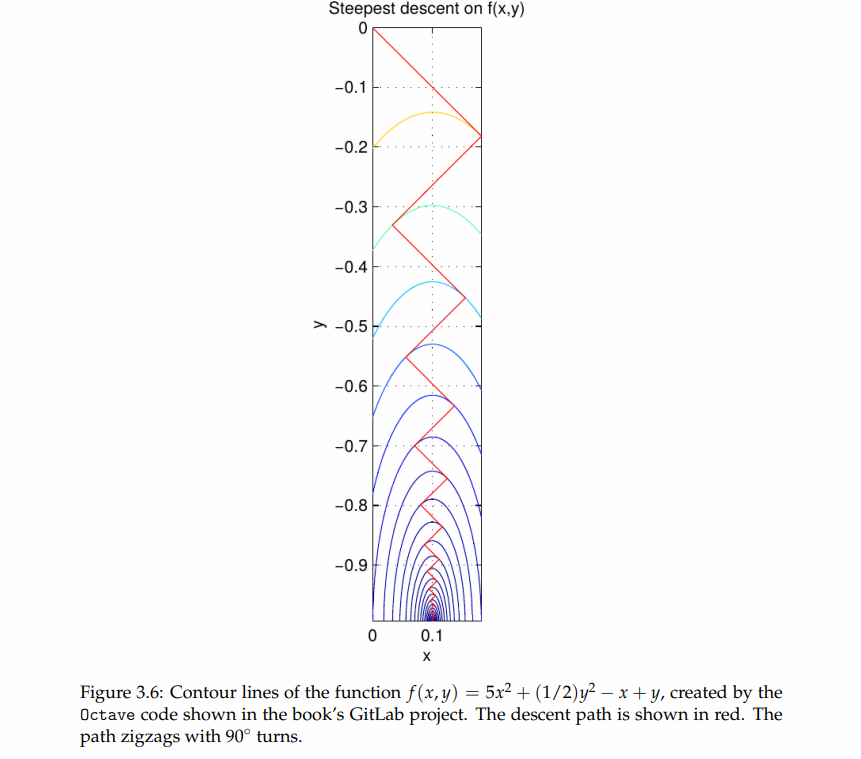

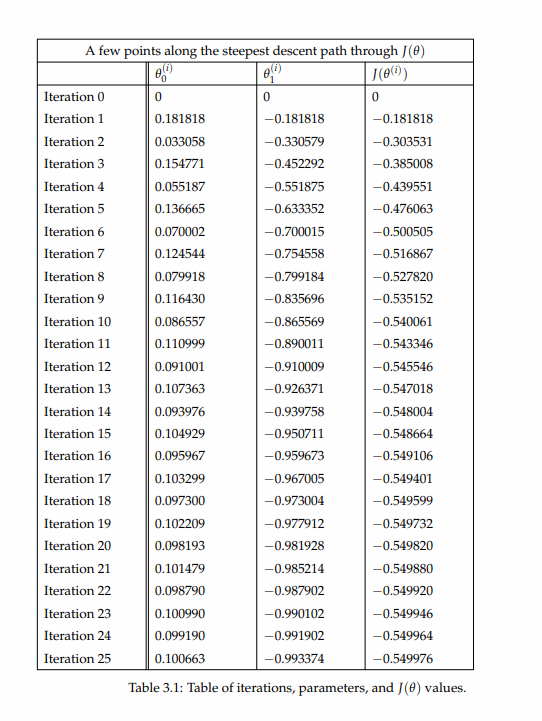

En lo que sigue de la clase, voy a mostrar unas graficas que construi con el objeto de visualizar el sentido de SD.



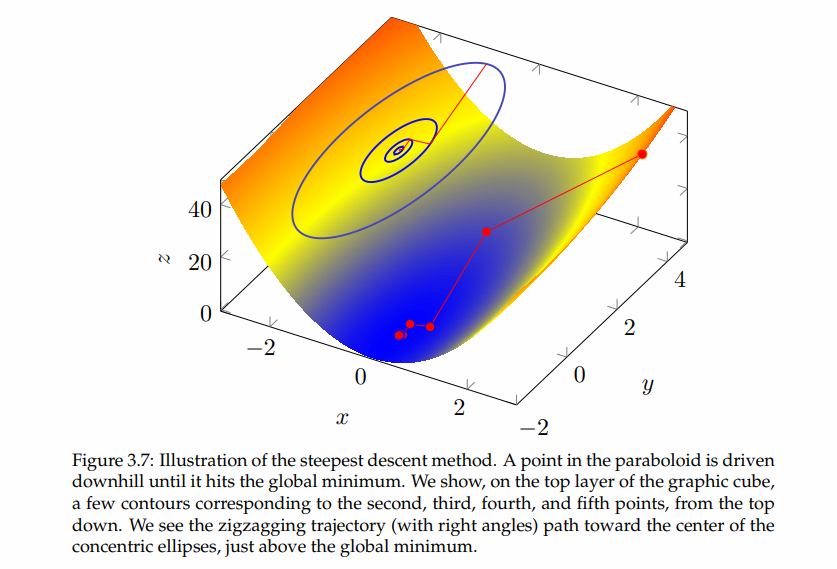

Las siguientes figuras explican por que para girar 90 grados necesitamos pasar por encima del eje de la elipse.

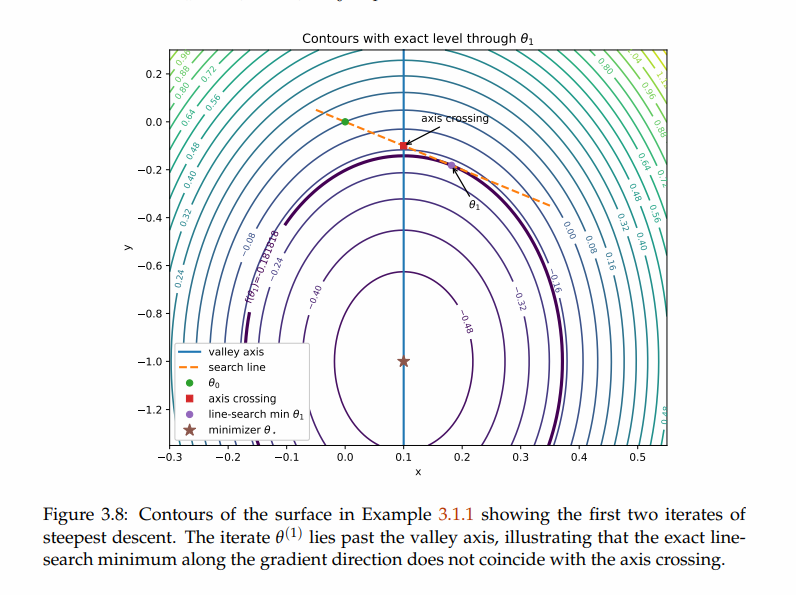

Ya di la explacion oralmente. Veamos la forma en superficie.


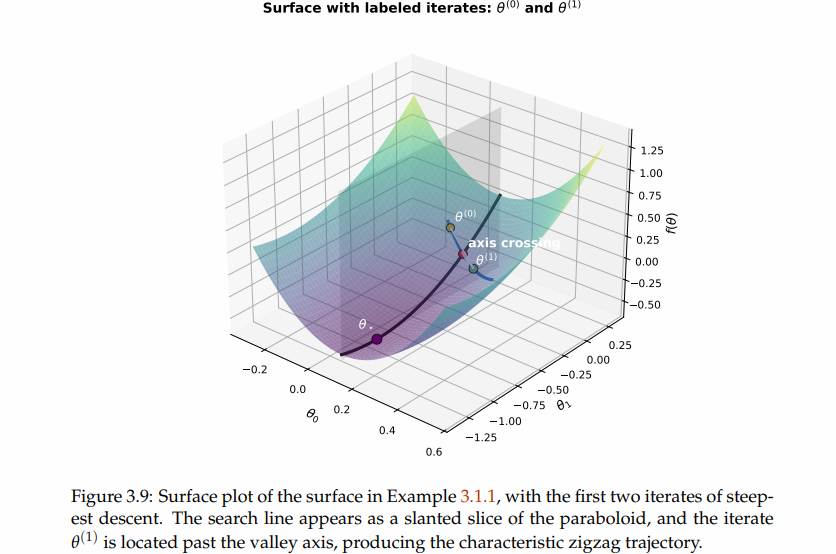

# Gradiente Conjugado.
## Introduccion.
La idea de Magnus Hesteness, Eduard Stiefel publicacron en 1952
[este metodo](https://nvlpubs.nist.gov/nistpubs/jres/049/jresv49n6p409_A1b.pdf) que es muy ingenioso. Corenlius Lanczos tambien en el mismo anho visualizo el algoritmo.

La idea es por que no converger en dos pasos en 2D.